## AC_getting_SDSS_S82_light_curves 

I try getting the  light curves from the S82 catalog  (Bramich2008).  I first query HLC (Higher Level Catalog), to find out their identifiers given the list of ra,dec , and then I pull the appropriate light curves from the LMCC (Light-Motion Curve Catalog )



In [1]:
#importing all packages
%matplotlib inline
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
from astropy.table import vstack
import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.io import fits

This is where the HLC and LMCC are from  : 
http://das.sdss.org/value_added/stripe_82_variability/SDSS_82_public/

In [2]:
# Read in the HLC data : 
catalogs = ['HLC.RA_20_to_21.fits.gz',
'HLC.RA_21_to_22.fits.gz',
'HLC.RA_22_to_23.fits.gz',
'HLC.RA_23_to_24.fits.gz',
'HLC.RA_00_to_01.fits.gz',
'HLC.RA_01_to_02.fits.gz',
'HLC.RA_02_to_03.fits.gz',
'HLC.RA_03_to_04.fits.gz']

def ReadTable(name):
    dir_hlc = '/Users/chris/GradTeaching/uw-astr598-w18/homeworks/group2/HW_1/'
    hlc_fits = fits.open(dir_hlc+name)
    hlc_table = Table(hlc_fits[1].data)
    return hlc_table

hlc = ReadTable(catalogs[0])
for catalog in catalogs[1:] : 
    print('Reading ', catalog)
    hlc_cat = ReadTable(catalog)
    hlc = vstack([hlc, hlc_cat])

print('Done reading HLC data')

Reading  HLC.RA_21_to_22.fits.gz
Reading  HLC.RA_22_to_23.fits.gz
Reading  HLC.RA_23_to_24.fits.gz
Reading  HLC.RA_00_to_01.fits.gz
Reading  HLC.RA_01_to_02.fits.gz
Reading  HLC.RA_02_to_03.fits.gz
Reading  HLC.RA_03_to_04.fits.gz
Done reading HLC data


In [18]:
# Read the list of 81 SDSS S82 stars   
stars = Table.read('StarID_PTF_CRTS_PS1-to_SDSS_overlap.txt',
                              format='ascii')

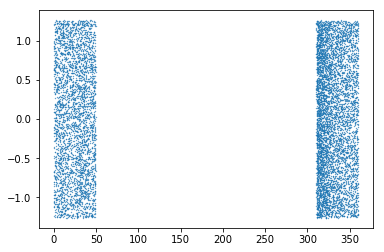

In [22]:
# choose random indices to scout the whole HLC for the range of 
# ra,dec that it contains .... 
idx = np.random.choice(len(hlc),10000,replace=False)
plt.scatter(hlc[idx]['RA_MEAN'] , hlc[idx]['DEC_MEAN'], s=0.1)

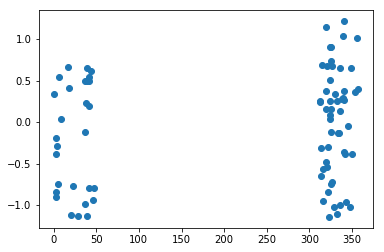

In [20]:
plt.scatter(stars['ra_sdss'],  stars['dec_sdss'])

In [23]:
# Use SkyCoord  to crossmatch ....
sdss_coords = SkyCoord(ra = stars['ra_sdss']*u.degree,  
                       dec = stars['dec_sdss']*u.degree)
hlc_coords = SkyCoord(ra=hlc['RA_MEAN']*u.degree, 
                      dec=hlc['DEC_MEAN']*u.degree)

# want each matching LC from HLC  ... 
idx, d2d, d3d = sdss_coords.match_to_catalog_sky(hlc_coords)  

sdss_hlc = hstack([stars,  hlc[idx][['RA_MEAN', 'DEC_MEAN', 
                                     'LC_NAME', 'IAU_NAME']]  
                  ])
sdss_hlc['d2d'] = d2d.arcsec


In [25]:
sdss_hlc.write('sdss_hlc_81_stars.txt', format='ascii')

In [26]:
sdss_hlc

starID,ra_sdss,dec_sdss,RA_MEAN,DEC_MEAN,LC_NAME,IAU_NAME,d2d
int64,float64,float64,float64,float64,str46,str24,float64
782619,20.1726341,-1.1254089,20.1726232104,-1.12540891533,RA_01_to_02/20/lc_01_20_41.429_-01_07_31.472_t,SDSS J012041.43-010731.5,0.0391949377235
692319,2.1529219,-0.844379,2.15291971228,-0.84437680616,RA_00_to_01/08/lc_00_08_36.700_-00_50_39.756_t,SDSS J000836.70-005039.8,0.0111530314741
795598,23.1087093,-0.768104,23.108692553,-0.768098875899,RA_01_to_02/32/lc_01_32_26.086_-00_46_05.155_t,SDSS J013226.08-004605.2,0.0630429744255
695398,2.2424421,-0.904605,2.24244336309,-0.90459823294,RA_00_to_01/08/lc_00_08_58.186_-00_54_16.551_t,SDSS J000858.18-005416.6,0.0247820453106
694691,2.530575,-0.387433,2.53057210795,-0.387434686595,RA_00_to_01/10/lc_00_10_07.337_-00_23_14.766_t,SDSS J001007.34-002314.7,0.0120523051878
823043,28.3637962,-1.1345879,28.363798646,-1.13458667941,RA_01_to_02/53/lc_01_53_27.311_-01_08_04.513_t,SDSS J015327.31-010804.5,0.00983949417112
697314,2.7475851,-0.189224,2.74758979066,-0.189215273201,RA_00_to_01/10/lc_00_10_59.421_-00_11_21.174_t,SDSS J001059.42-001121.2,0.0356670986445
869172,36.4527168,-0.116482,36.4527218607,-0.116486488859,RA_02_to_03/25/lc_02_25_48.653_-00_06_59.353_t,SDSS J022548.64-000659.3,0.0243526538107
867935,36.5218506,-0.983534,36.5218481359,-0.983520825895,RA_02_to_03/26/lc_02_26_05.243_-00_59_00.676_t,SDSS J022605.24-005900.6,0.0482489846945
